In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import pyspark
#import datawig
from scipy.stats import skew

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.appName('Practice').getOrCreate()

In [4]:
spark

In [5]:
df=spark.read.csv('zomato.csv',header=True,inferSchema=True)
df.select(df.columns[0:6]).show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|                 url|             address|                name|        online_order|          book_table| rate|
+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|https://www.zomat...|942, 21st Main Ro...|               Jalsa|                 Yes|                 Yes|4.1/5|
|     +91 9743772233"|        Banashankari|       Casual Dining|Pasta, Lunch Buff...|North Indian, Mug...|  800|
|https://www.zomat...|2nd Floor, 80 Fee...|      Spice Elephant|                 Yes|                  No|4.1/5|
|https://www.zomat...|1112, Next to KIM...|     San Churro Cafe|                 Yes|                  No|3.8/5|
|https://www.zomat...|1st Floor, Annaku...|Addhuri Udupi Bho...|                  No|                  No|3.7/5|
|https://www.zomat...|10, 3rd Floor, La...|       Grand Village|                  No|           

In [6]:
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.printSchema()

root
 |-- url: string (nullable = true)
 |-- address: string (nullable = true)
 |-- name: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- book_table: string (nullable = true)
 |-- rate: string (nullable = true)
 |-- votes: string (nullable = true)
 |-- phone: string (nullable = true)
 |-- location: string (nullable = true)
 |-- rest_type: string (nullable = true)
 |-- dish_liked: string (nullable = true)
 |-- cuisines: string (nullable = true)
 |-- approx_cost(for two people): string (nullable = true)
 |-- reviews_list: string (nullable = true)
 |-- menu_item: string (nullable = true)
 |-- listed_in(type): string (nullable = true)
 |-- listed_in(city): string (nullable = true)



In [8]:
df.columns

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [9]:
df.describe().show()

+-------+--------------------+--------------------+--------------------+------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+
|summary|                 url|             address|                name|online_order|book_table|              rate|               votes|               phone|            location|           rest_type|          dish_liked|            cuisines|approx_cost(for two people)|        reviews_list|           menu_item|     listed_in(type)|     listed_in(city)|
+-------+--------------------+--------------------+--------------------+------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--

In [10]:
df.filter(df.show().isNotNull())

+--------------------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+
|                 url|             address|                name|        online_order|          book_table| rate|               votes|               phone|            location|           rest_type|          dish_liked|            cuisines|approx_cost(for two people)|        reviews_list|           menu_item|     listed_in(type)|     listed_in(city)|
+--------------------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+-----------

AttributeError: 'NoneType' object has no attribute 'isNotNull'

In [16]:
df=pd.read_csv('zomato.csv')

In [17]:
df['online_order'] = df['online_order'].map(dict(Yes=1, No=0))

In [18]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
del df['url']
del df['address']
del df['phone']

In [7]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.online_order = pd.to_numeric(df.online_order)
df.book_table = pd.to_numeric(df.book_table)

C:\Users\Arnav Saini\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arnav Saini\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Arnav Saini\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sy

In [8]:
df4 = df['rate']
df['rate'] = df4.dropna().apply(lambda x: float(x.split('/')[0]) if (len(x)>3) else np.nan).dropna()
df

name  online_order  \
0                                                  Jalsa             1   
1                                         Spice Elephant             1   
2                                        San Churro Cafe             1   
3                                  Addhuri Udupi Bhojana             0   
4                                          Grand Village             0   
...                                                  ...           ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...             0   
51713                           Vinod Bar And Restaurant             0   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...             0   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...             0   
51716                       The Nest - The Den Bengaluru             0   

       book_table  rate  votes                    location  \
0               1   4.1    775                Banashankari   
1               0   4.1    787                Banashankari   
2               0   3.8    918                Banashankari   
3               0   3.7     88                Banashankari   
4               0   3.8    166                Basavanagudi   
...           ...   ...    ...                         ...   
51712           0   3.6     27                  Whitefield   
51713           0   NaN      0                  Whitefield   
51714           0   NaN      0                  Whitefield   
51715           1   4.3    236  ITPL Main Road, Whitefield   
51716           0   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                         dish_liked  \
0            Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1            Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3              Quick Bites                                        Masala Dosa   
4            Casual Dining                                Panipuri, Gol Gappe   
...                    ...                                                ...   
51712                  Bar                                                NaN   
51713                  Bar                                                NaN   
51714                  Bar                                                NaN   
51715                  Bar                       Cocktails, Pizza, Buttermilk   
51716   Bar, Casual Dining                                                NaN   

                                     cuisines approx_cost(for two people)  \
0              North Indian, Mughlai, Chinese                         800   
1                 Chinese, North Indian, Thai                         800   
2                      Cafe, Mexican, Italian                         800   
3                  South Indian, North Indian                         300   
4                    North Indian, Rajasthani                         600   
...                                       ...                         ...   
51712                             Continental                       1,500   
51713                             Finger Food                         600   
51714                             Finger Food                       2,000   
51715                             Finger Food                       2,500   
51716  Finger Food, North Indian, Continental                       1,500   

                                            reviews_list menu_item  \
0      [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1      [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2      [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3      [('Rated 4.0', "RATED\n  Great food and proper...        []   
4      [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   
...                                                  ...       ...   
51712  [('Rated 5.0', "RATED\n

In [9]:
df.describe()

,online_order,book_table,rate,votes
count,51717.000000,51717.000000,41665.000000,51717.000000
mean,0.588665,0.124698,3.700449,283.697527
std,0.492080,0.330379,0.440513,803.838853
min,0.000000,0.000000,1.800000,0.000000
25%,0.000000,0.000000,3.400000,7.000000
50%,1.000000,0.000000,3.700000,41.000000
75%,1.000000,0.000000,4.000000,198.000000
max,1.000000,1.000000,4.900000,16832.000000


In [10]:
def comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['costfor2'] = df['approx_cost(for two people)'].apply(comma)
del df['approx_cost(for two people)']

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

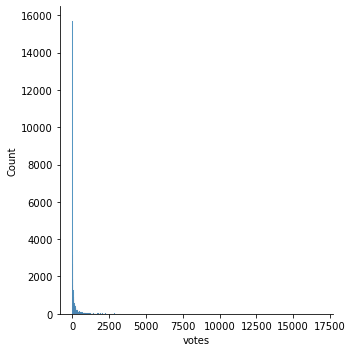

In [22]:
sns.displot(df['votes'].dropna())

Text(0, 0.5, 'Density')

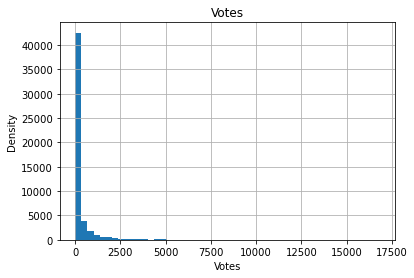

In [23]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

Text(0, 0.5, 'Density')

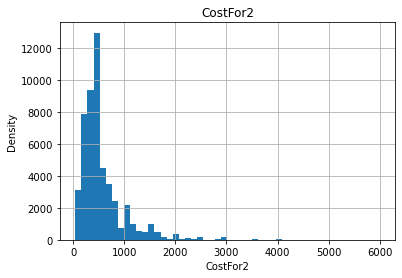

In [24]:
fig=df.costfor2.hist(bins=50)
fig.set_title('CostFor2')
fig.set_xlabel('CostFor2')
fig.set_ylabel('Density')

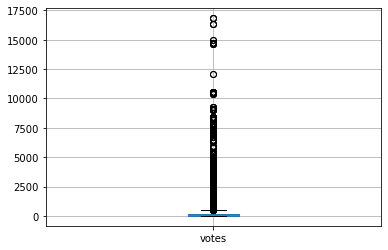

In [25]:
fig=df.boxplot(column='votes')

In [26]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
online_order,-0.360383,-1.870197
book_table,2.272035,3.162267
rate,-0.328601,-0.007483
votes,7.547819,88.866738
costfor2,2.601983,10.449886


In [27]:
df['votes']=np.sqrt(df['votes'])

In [28]:
df['costfor2']=np.sqrt(df['costfor2'])

In [29]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
online_order,-0.360383,-1.870197
book_table,2.272035,3.162267
rate,-0.328601,-0.007483
votes,2.539908,9.350528
costfor2,1.293373,2.332410


Text(0, 0.5, 'Density')

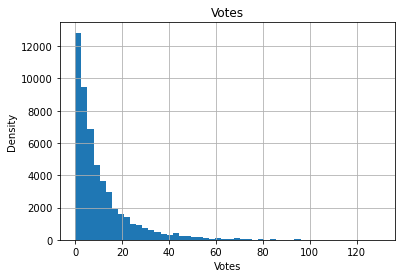

In [30]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

In [31]:
#IQR=df.votes.quantile(0.75)-df.votes.quantile(0.25)

In [32]:
'''''
lower=df['votes'].quantile(0.25)-(IQR*1.5)
upper=df['votes'].quantile(0.75)+(IQR*1.5)
print(lower),print(upper)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-32-f4bf75645333>, line 4)

In [33]:
''''
lower=df['votes'].quantile(0.25)-(IQR*3)
upper=df['votes'].quantile(0.75)+(IQR*3)
print(lower),print(upper)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-33-72a958d9f498>, line 4)

In [34]:
#df=df.copy()

In [35]:
#df.loc[df['votes']>=48,'votes']=48

Text(0, 0.5, 'Density')

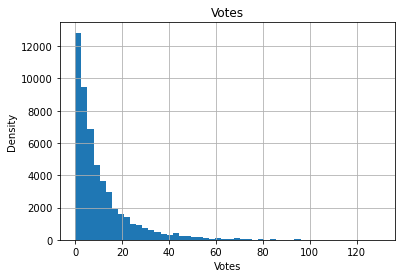

In [36]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

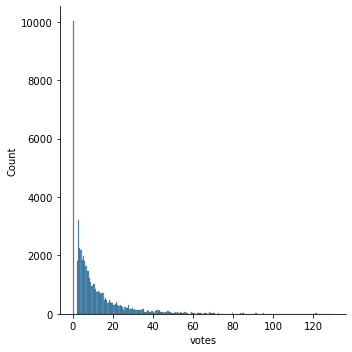

In [37]:
sns.displot(df['votes'].dropna())

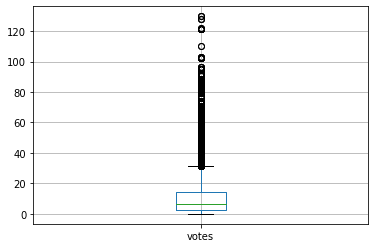

In [38]:
fig=df.boxplot(column='votes')

In [39]:
df = df.rename(columns={'approx_cost(for two people)':'costfor2','listed_in(type)':'type','listed_in(city)':'city'})

In [40]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
51687    False
51688    False
51689    False
51690    False
51691    False
51692    False
51693    False
51694    False
51695    False
51696    False
51697    False
51698    False
51699    False
51700    False
51701    False
51702    False
51703    False
51704    False
51705    False
51706    False
51707    False
51708    False
51709    False
51710    False
51711    False
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [41]:
df.duplicated().sum()

63

In [42]:
df.drop_duplicates(inplace=True)

In [43]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [44]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location           21
rest_type         227
dish_liked      28027
cuisines           45
reviews_list        0
menu_item           0
type                0
city                0
costfor2          345
dtype: int64

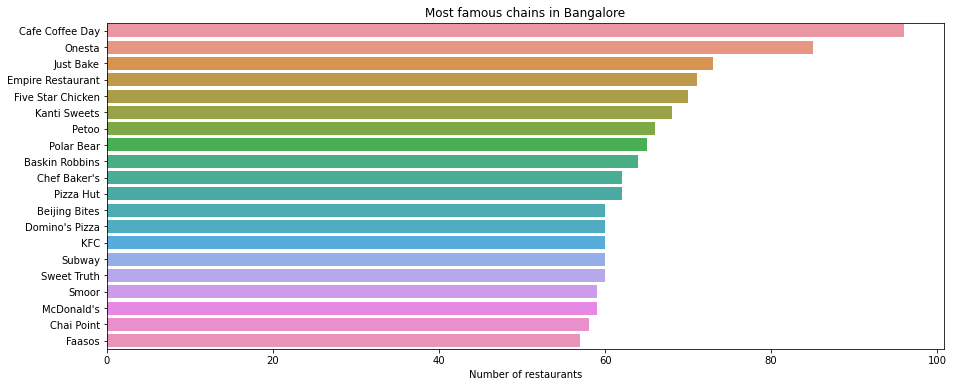

In [45]:
plt.figure(figsize=(15, 6))
df1 = df['name'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous chains in Bangalore')
plt.xlabel('Number of restaurants')
plt.show()

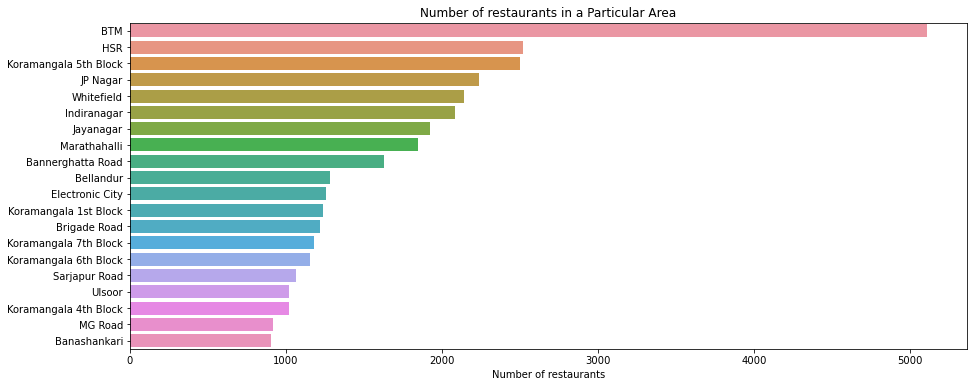

In [46]:
plt.figure(figsize=(15, 6))
df1 = df['location'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Number of restaurants in a Particular Area')
plt.xlabel('Number of restaurants')
plt.show()

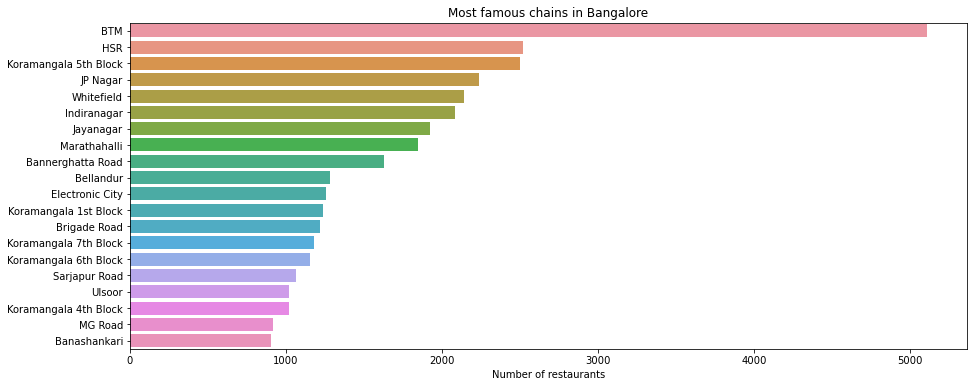

In [47]:
plt.figure(figsize=(15, 6))
df1 = df['location'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous chains in Bangalore')
plt.xlabel('Number of restaurants')
plt.show()

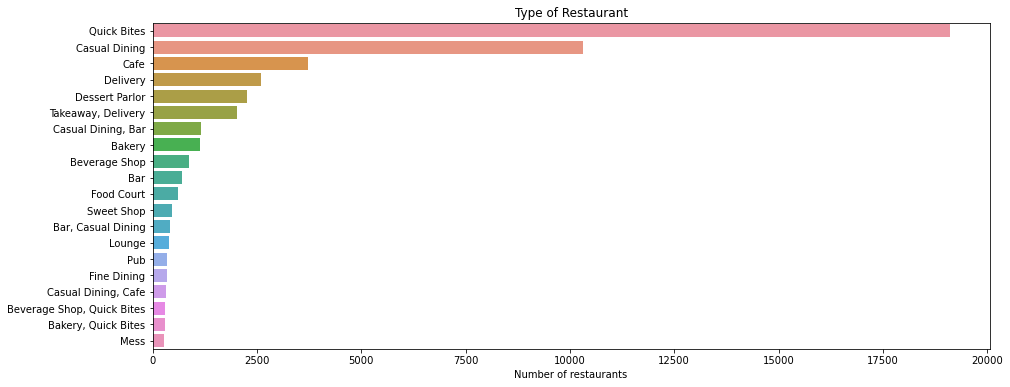

In [48]:
plt.figure(figsize=(15, 6))
df1 = df['rest_type'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Type of Restaurant')
plt.xlabel('Number of restaurants')
plt.show()

C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants taking online orders')

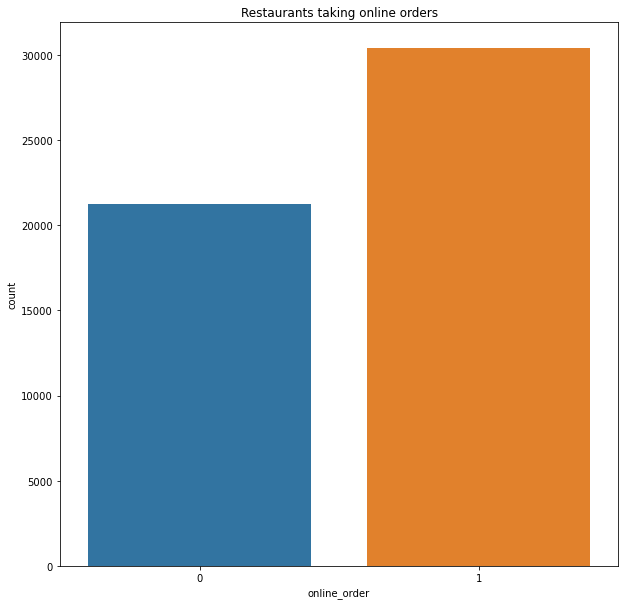

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(df['online_order'])
plt.title('Restaurants taking online orders')

In [50]:
df['online_order'].value_counts()

1    30395
0    21259
Name: online_order, dtype: int64

In [51]:
df['book_table'].value_counts()

0    45215
1     6439
Name: book_table, dtype: int64

C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Table Booking')

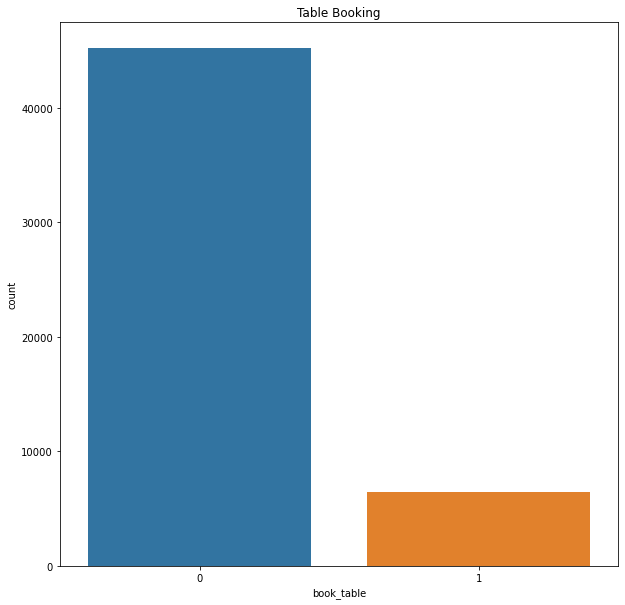

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(df['book_table'])
plt.title('Table Booking')

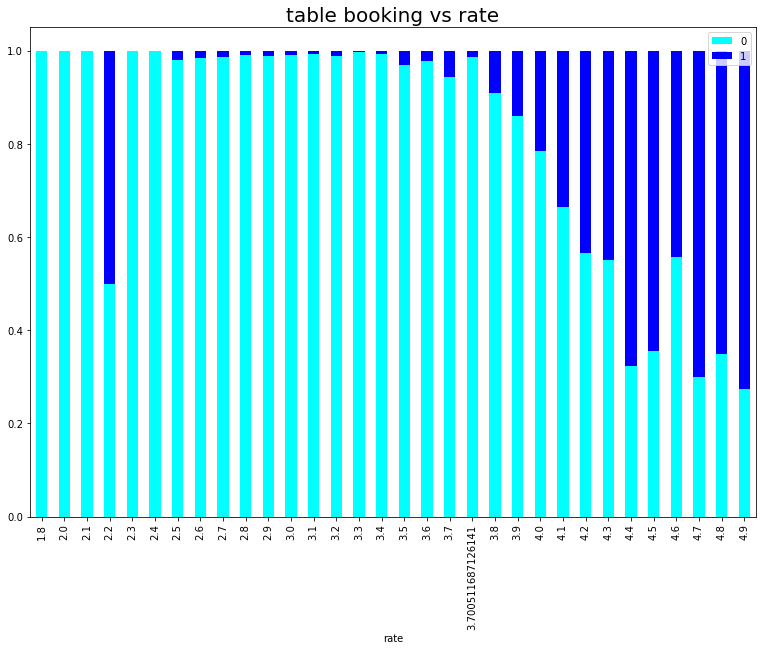

In [53]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['cyan','blue'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

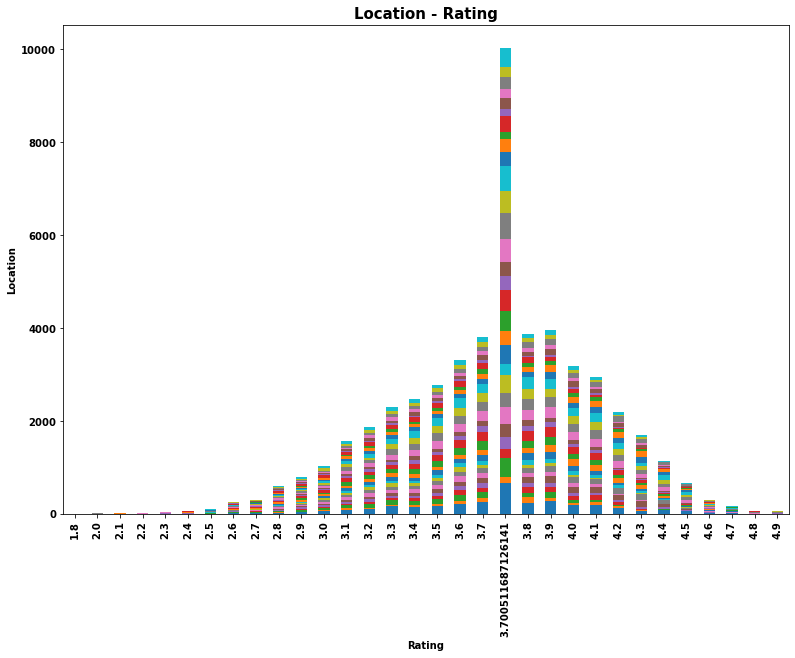

In [54]:
#Location and Rating
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cost of Restuarant')

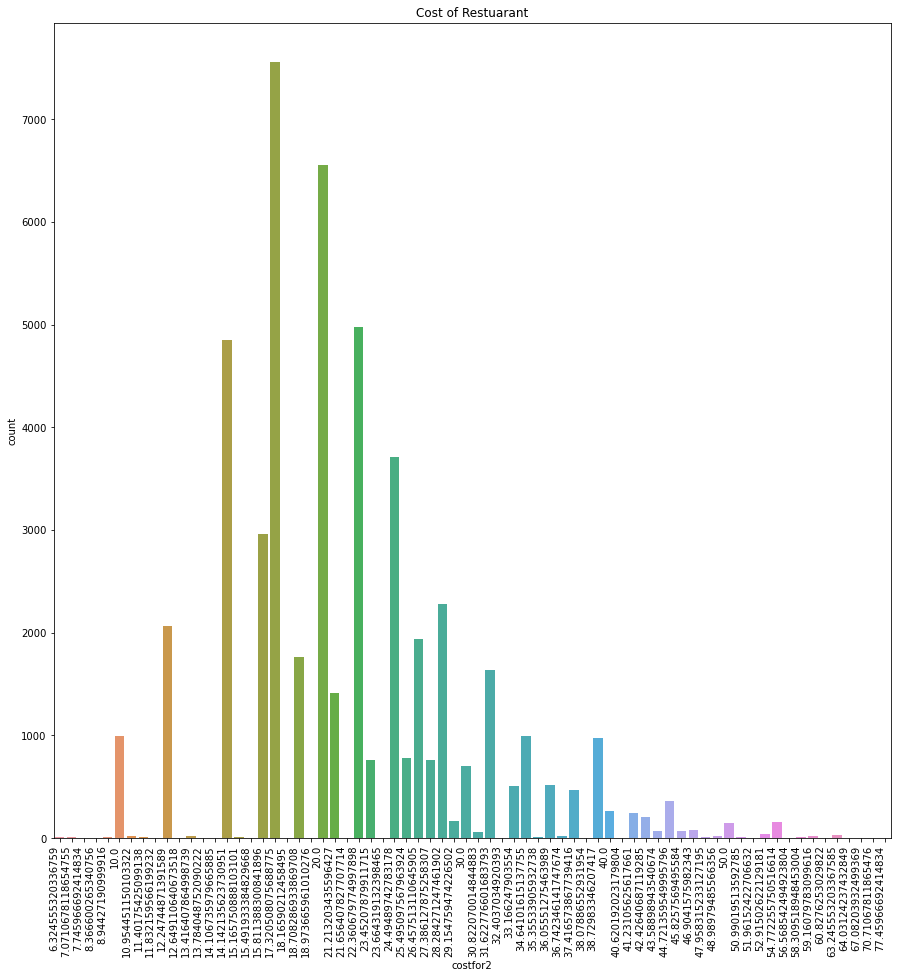

In [55]:
#Cost of Restuarant
sns.countplot(df['costfor2'])
sns.countplot(df['costfor2']).set_xticklabels(sns.countplot(df['costfor2']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

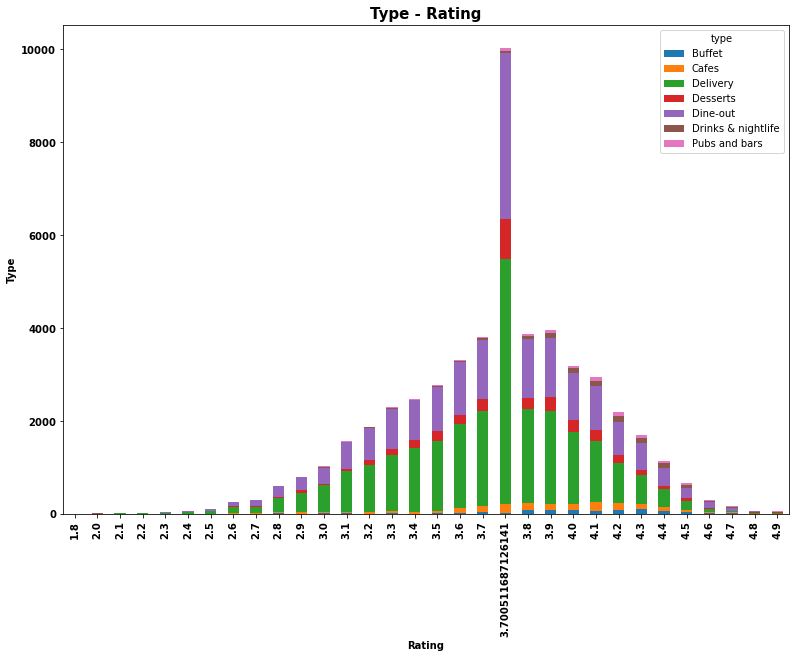

In [56]:
#Type and Rating
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

<Figure size 504x360 with 0 Axes>

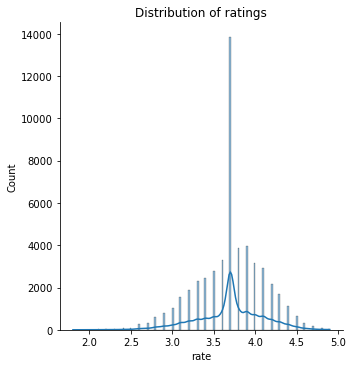

In [57]:
plt.figure(figsize=(7, 5))
sns.displot(df['rate'], kde=True)
plt.title('Distribution of ratings')
plt.show()

In [58]:
df['rate']

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
5        3.800000
6        3.600000
7        4.600000
8        4.000000
9        4.200000
10       4.100000
11       4.200000
12       4.200000
13       4.000000
14       3.800000
15       3.800000
16       3.900000
17       3.800000
18       3.900000
19       3.100000
20       3.000000
21       3.700000
22       3.600000
23       3.600000
24       3.700000
25       3.200000
26       3.800000
27       3.300000
28       3.300000
29       3.800000
           ...   
51687    4.400000
51688    4.000000
51689    4.100000
51690    4.200000
51691    4.200000
51692    3.900000
51693    4.100000
51694    4.100000
51695    4.200000
51696    4.300000
51697    4.400000
51698    3.900000
51699    4.100000
51700    4.100000
51701    4.100000
51702    4.000000
51703    3.900000
51704    4.000000
51705    3.800000
51706    3.700000
51707    3.900000
51708    2.800000
51709    3.700000
51710    3.700512
51711    2

<AxesSubplot:>

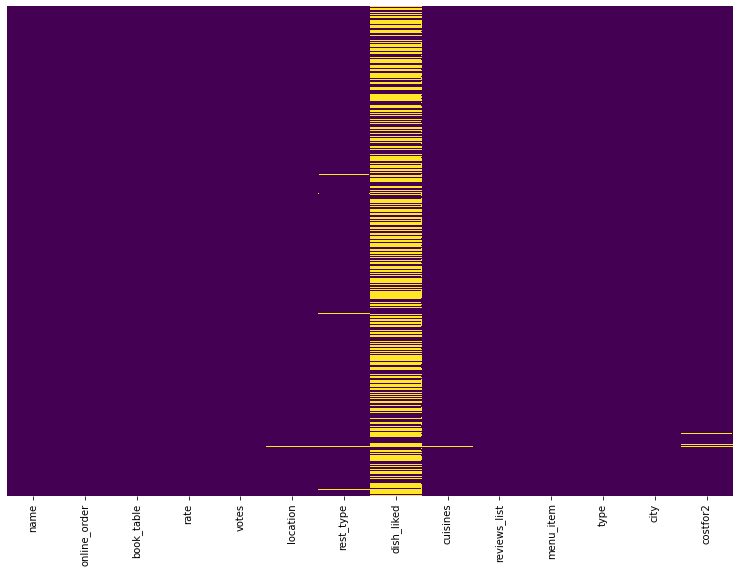

In [59]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

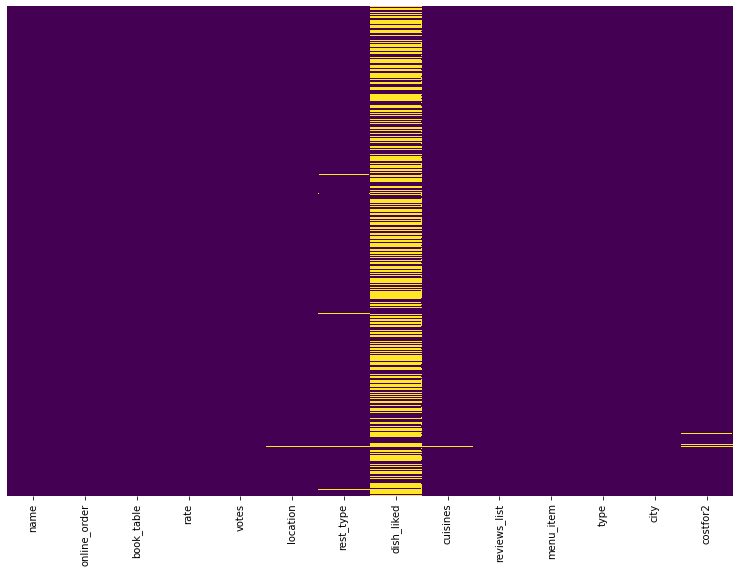

In [60]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [61]:
df['rate'].isnull().sum()

0

In [62]:
df.drop(['menu_item','dish_liked'],axis=1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,type,city,costfor2
0,Jalsa,1,1,4.100000,27.838822,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.100000,28.053520,Banashankari,Casual Dining,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.800000,30.298515,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.700000,9.380832,Banashankari,Quick Bites,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.800000,12.884099,Basavanagudi,Casual Dining,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,24.494897
5,Timepass Dinner,1,0,3.800000,16.911535,Basavanagudi,Casual Dining,North Indian,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari,24.494897
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.600000,2.828427,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese","[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari,28.284271
7,Onesta,1,1,4.600000,50.556899,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian","[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari,24.494897
8,Penthouse Cafe,1,0,4.000000,18.000000,Banashankari,Cafe,"Cafe, Italian, Continental","[('Rated 3.0', ""RATED\n I had been to this pl...",Cafes,Banashankari,26.457513
9,Smacznego,1,0,4.200000,22.449944,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages","[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes,Banashankari,23.452079


In [63]:
df.dropna(inplace=True)

In [64]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
reviews_list    0
menu_item       0
type            0
city            0
costfor2        0
dtype: int64

C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='costfor2', ylabel='Density'>

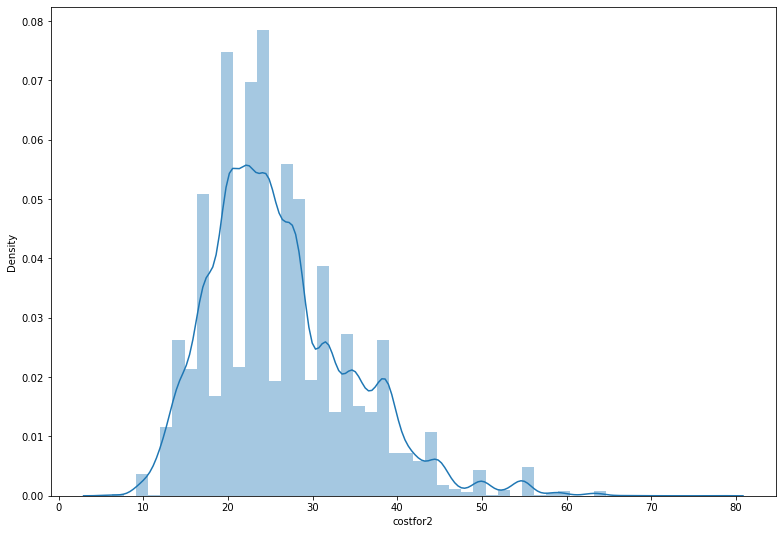

In [65]:
sns.distplot(df['costfor2'])

C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='votes', ylabel='Density'>

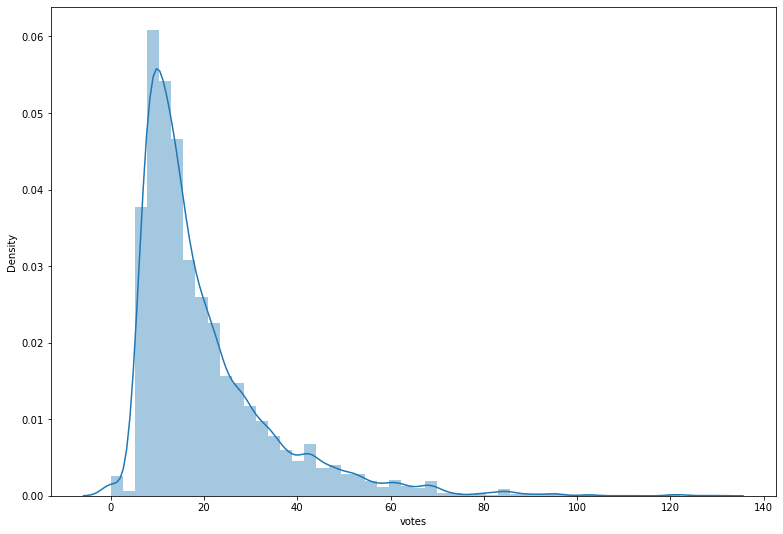

In [66]:
sns.distplot(df['votes'])

C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

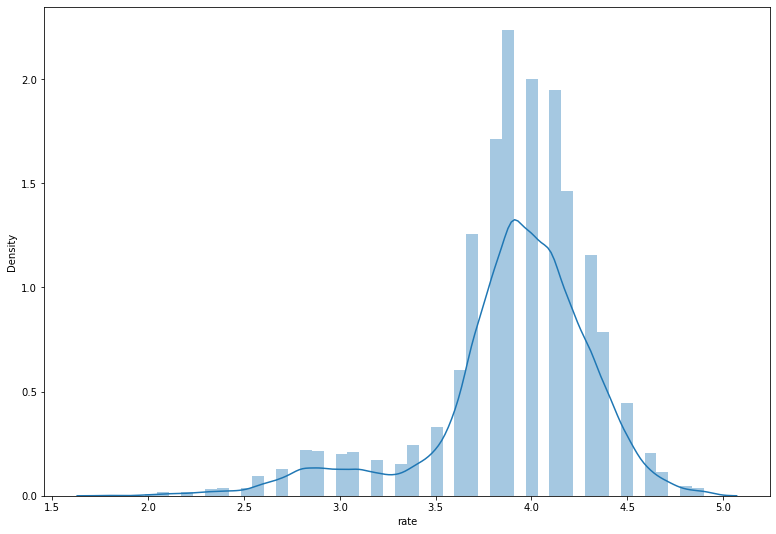

In [67]:
sns.distplot(df['rate'])

In [68]:
df = df.drop(['menu_item'],axis=1)

In [69]:
df['rest_type'].value_counts()

Casual Dining                  7393
Quick Bites                    5269
Cafe                           2383
Dessert Parlor                 1085
Casual Dining, Bar              992
Delivery                        707
Bar                             358
Bar, Casual Dining              351
Takeaway, Delivery              344
Pub                             326
Lounge                          313
Fine Dining                     311
Casual Dining, Cafe             304
Pub, Casual Dining              230
Food Court                      220
Bakery                          167
Cafe, Casual Dining             159
Dessert Parlor, Cafe            143
Beverage Shop                   138
Beverage Shop, Quick Bites      137
Microbrewery, Casual Dining     132
Cafe, Bakery                    128
Casual Dining, Pub              124
Cafe, Dessert Parlor            111
Sweet Shop                      105
Bakery, Quick Bites              96
Sweet Shop, Quick Bites          88
Pub, Microbrewery           

In [70]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,reviews_list,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.1,28.053520,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.8,12.884099,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,24.494897
5,Timepass Dinner,1,0,3.8,16.911535,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet,Banashankari,24.494897
7,Onesta,1,1,4.6,50.556899,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian","[('Rated 5.0', 'RATED\n I personally really l...",Cafes,Banashankari,24.494897
8,Penthouse Cafe,1,0,4.0,18.000000,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental","[('Rated 3.0', ""RATED\n I had been to this pl...",Cafes,Banashankari,26.457513
9,Smacznego,1,0,4.2,22.449944,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages","[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",Cafes,Banashankari,23.452079
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,1,0,4.1,20.049938,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,"[('Rated 4.0', 'RATED\n We ended up here on a...",Cafes,Banashankari,22.360680


In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [72]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.dish_liked = le.fit_transform(df.dish_liked)
df.type = le.fit_transform(df.type)
df.city = le.fit_transform(df.city)

In [73]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,reviews_list,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,1,20,3628,1393,"[('Rated 4.0', 'RATED\n A beautiful place to ...",0,1,28.284271
1,Spice Elephant,1,0,4.1,28.053520,1,20,2950,596,"[('Rated 4.0', 'RATED\n Had been here for din...",0,1,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,1,16,1409,485,"[('Rated 3.0', ""RATED\n Ambience is not that ...",0,1,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,1,62,2752,1597,"[('Rated 4.0', ""RATED\n Great food and proper...",0,1,17.320508
4,Grand Village,0,0,3.8,12.884099,4,20,3435,1414,"[('Rated 4.0', 'RATED\n Very good restaurant ...",0,1,24.494897


In [74]:
df = df.drop(['reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,1,20,3628,1393,0,1,28.284271
1,Spice Elephant,1,0,4.1,28.053520,1,20,2950,596,0,1,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,1,16,1409,485,0,1,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,1,62,2752,1597,0,1,17.320508
4,Grand Village,0,0,3.8,12.884099,4,20,3435,1414,0,1,24.494897


In [75]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.online_order = pd.to_numeric(df.online_order)
df.book_table = pd.to_numeric(df.book_table)

C:\Users\Arnav Saini\anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\Arnav Saini\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Arnav Saini\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Arnav Saini\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [76]:
my_data=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
my_data.to_csv('Zomato_df.csv')
my_data.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,type,city,costfor2
0,1,1,4.1,27.838822,1,20,3628,1393,0,1,28.284271
1,1,0,4.1,28.053520,1,20,2950,596,0,1,28.284271
2,1,0,3.8,30.298515,1,16,1409,485,0,1,28.284271
3,0,0,3.7,9.380832,1,62,2752,1597,0,1,17.320508
4,0,0,3.8,12.884099,4,20,3435,1414,0,1,24.494897


In [77]:
x = df.iloc[:,[1,2,4,5,6,7,8,9,10,11]]
x.head()

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,type,city,costfor2
0,1,1,27.838822,1,20,3628,1393,0,1,28.284271
1,1,0,28.053520,1,20,2950,596,0,1,28.284271
2,1,0,30.298515,1,16,1409,485,0,1,28.284271
3,0,0,9.380832,1,62,2752,1597,0,1,17.320508
4,0,0,12.884099,4,20,3435,1414,0,1,24.494897


In [78]:
y = df['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [83]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16396 entries, 49339 to 38866
Data columns (total 10 columns):
online_order    16396 non-null int64
book_table      16396 non-null int64
votes           16396 non-null float64
location        16396 non-null int32
rest_type       16396 non-null int32
dish_liked      16396 non-null int32
cuisines        16396 non-null int32
type            16396 non-null int32
city            16396 non-null int32
costfor2        16396 non-null float64
dtypes: float64(2), int32(6), int64(2)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7028 entries, 18729 to 32268
Data columns (total 10 columns):
online_order    7028 non-null int64
book_table      7028 non-null int64
votes           7028 non-null float64
location        7028 non-null int32
rest_type       7028 non-null int32
dish_liked      7028 non-null int32
cuisines        7028 non-null int32
type            7028 non-null int32
city            7028 non-null int32
costfor2       

In [84]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [85]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_predict=lr_model.predict(x_test)
r2_score(y_test,y_predict)

0.25355478348334093

In [86]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.8747630997601494

In [87]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)
r2_score(y_test,y_predict)

0.9183934252207188

In [ ]:
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [88]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04514340066940273
Mean Squared Error: 0.014641443590888224
Root Mean Squared Error: 0.12100183300631534


In [ ]:
y_predict.shape

In [ ]:
df.hist(figsize=(12,8),bins=20)
plt.show()